<a href="https://colab.research.google.com/github/pvarun75/AIML_Batch_15/blob/main/DieTanic_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data=pd.read_csv('/content/train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

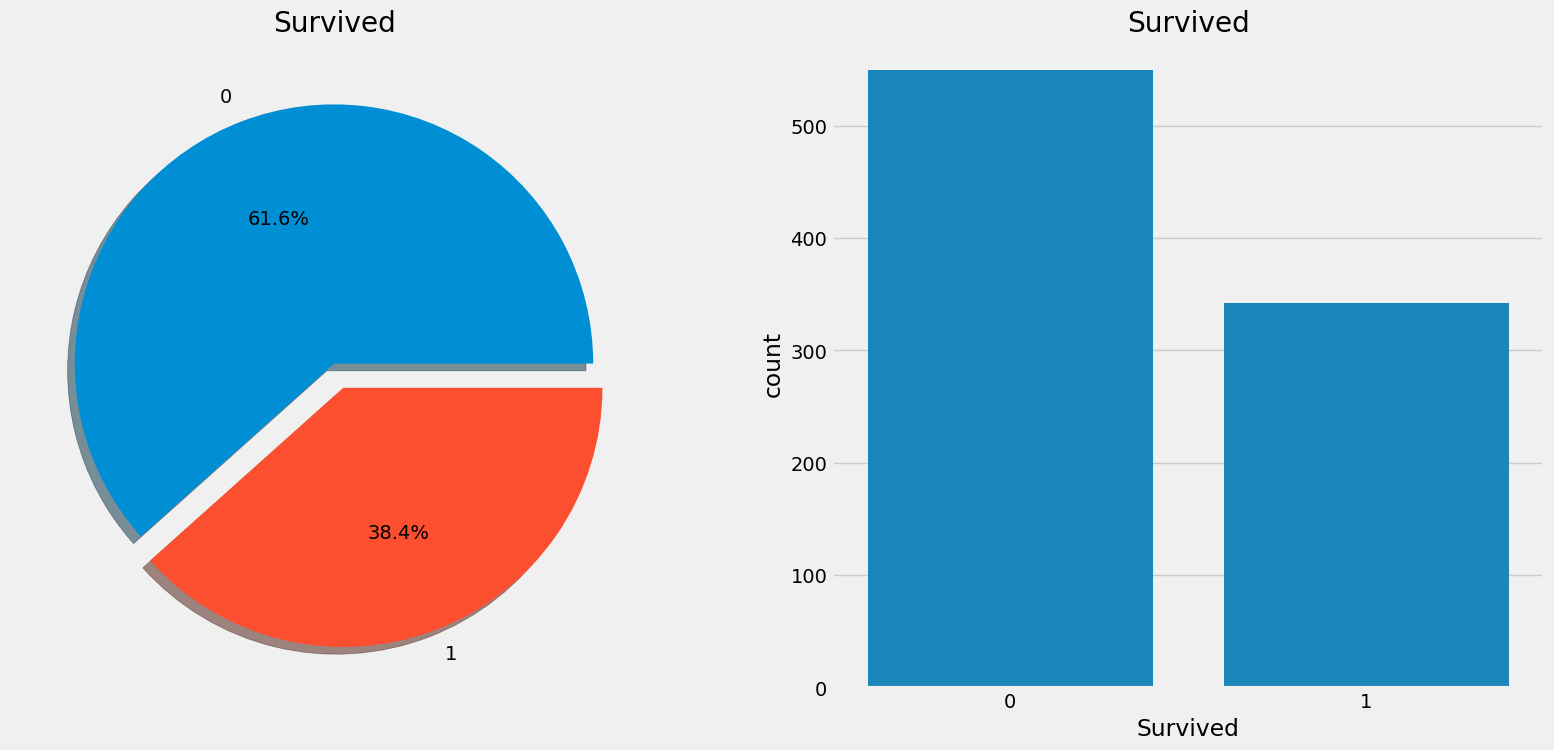

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()


In [ ]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

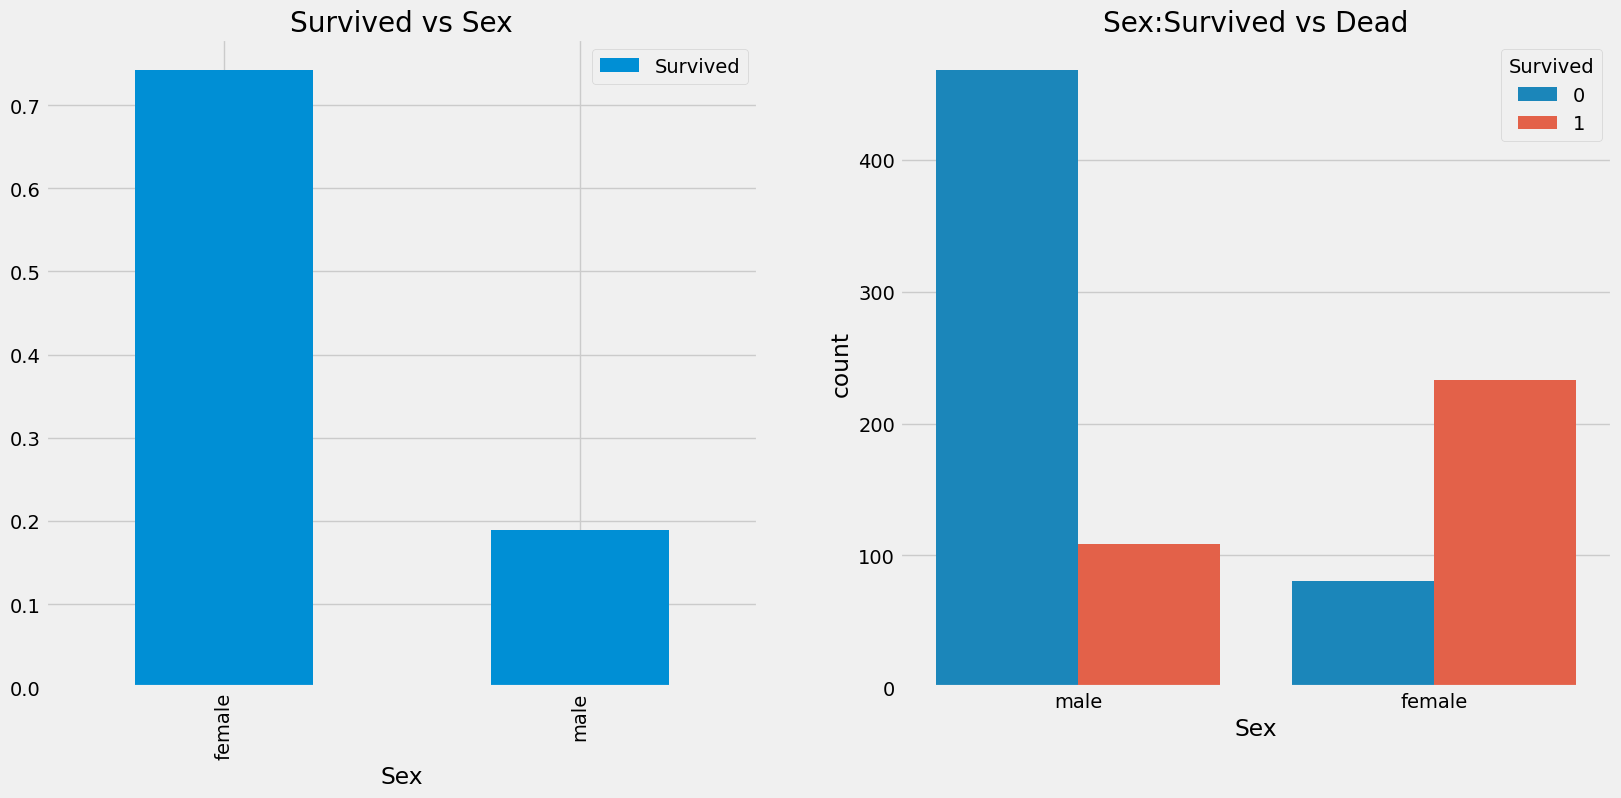

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])

ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [ ]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


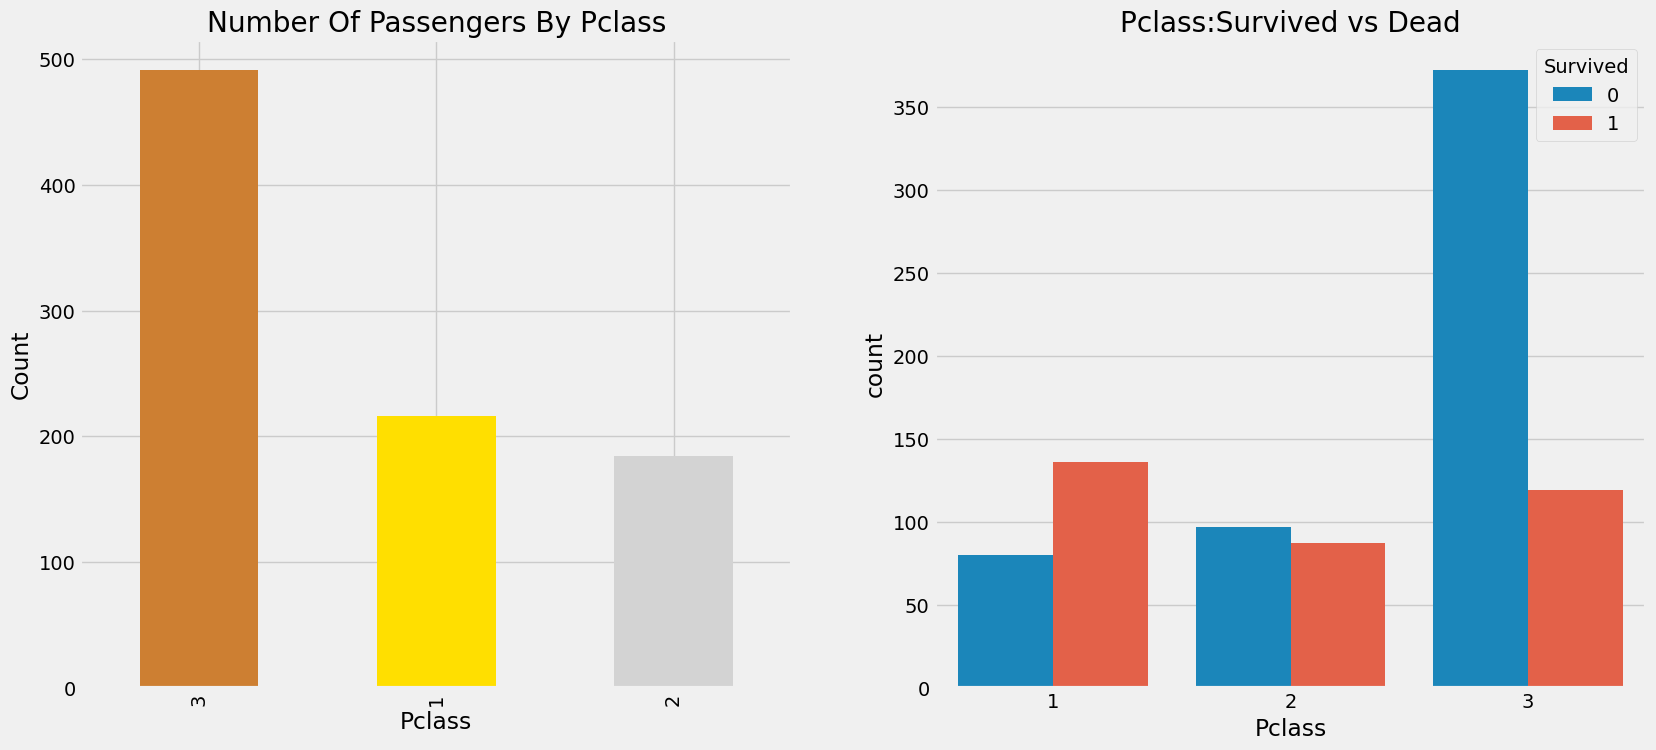

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])

ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [ ]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

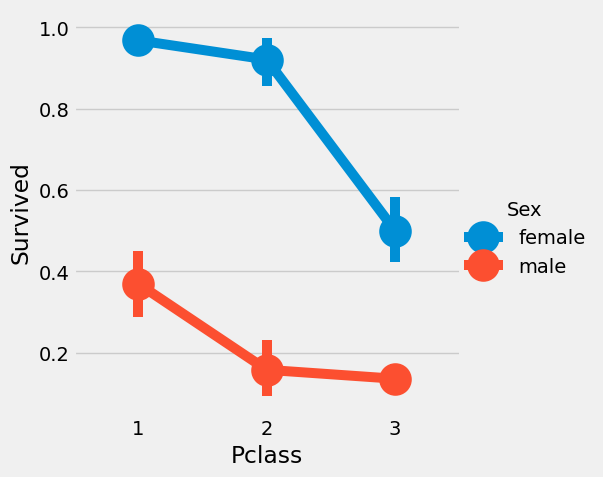

In [ ]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()


In [ ]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


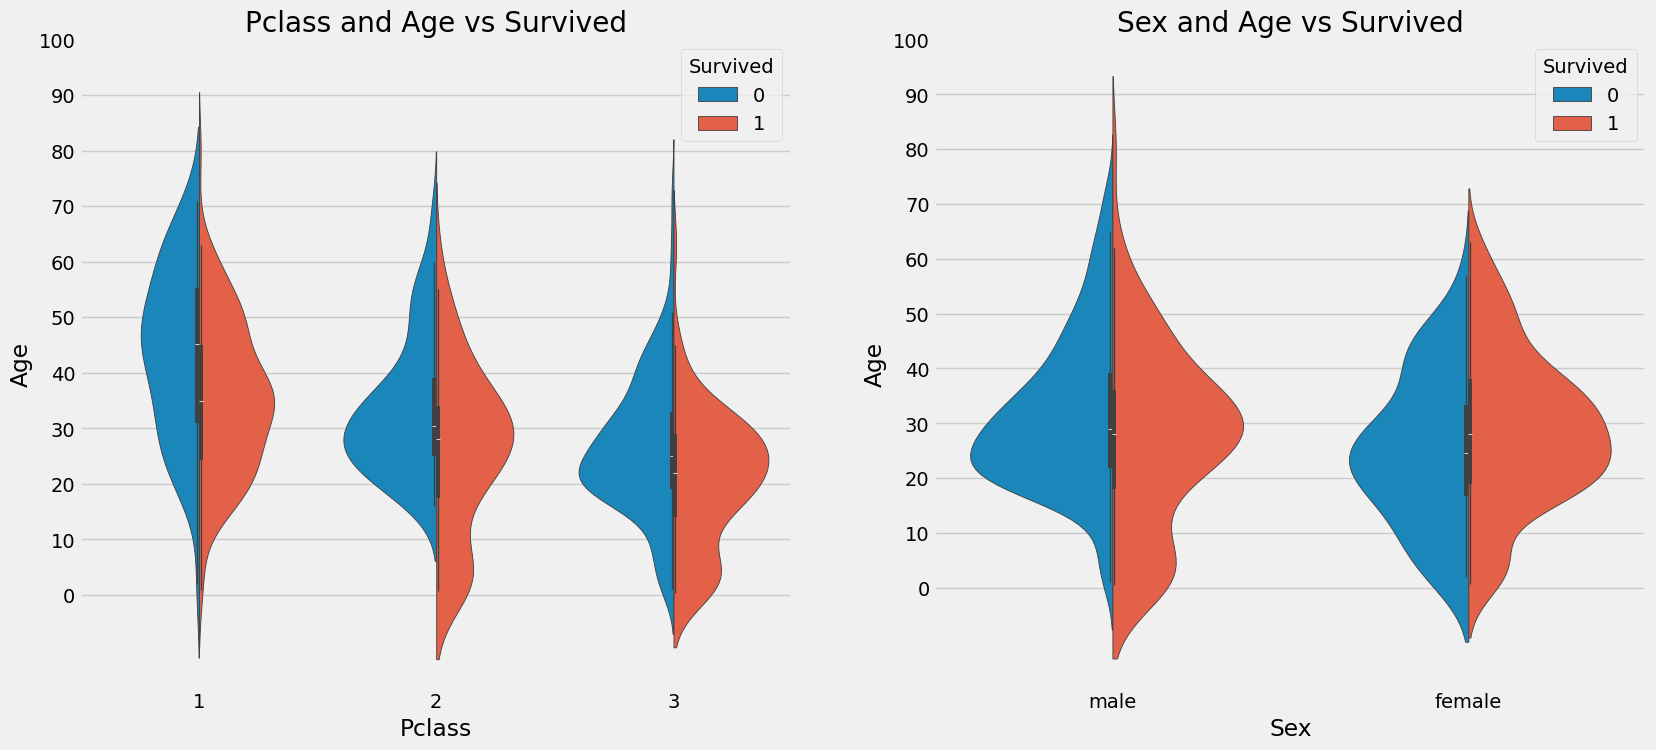

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()


In [ ]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [ ]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [ ]:
data.Age.isnull().any() #So no null values left finally

False

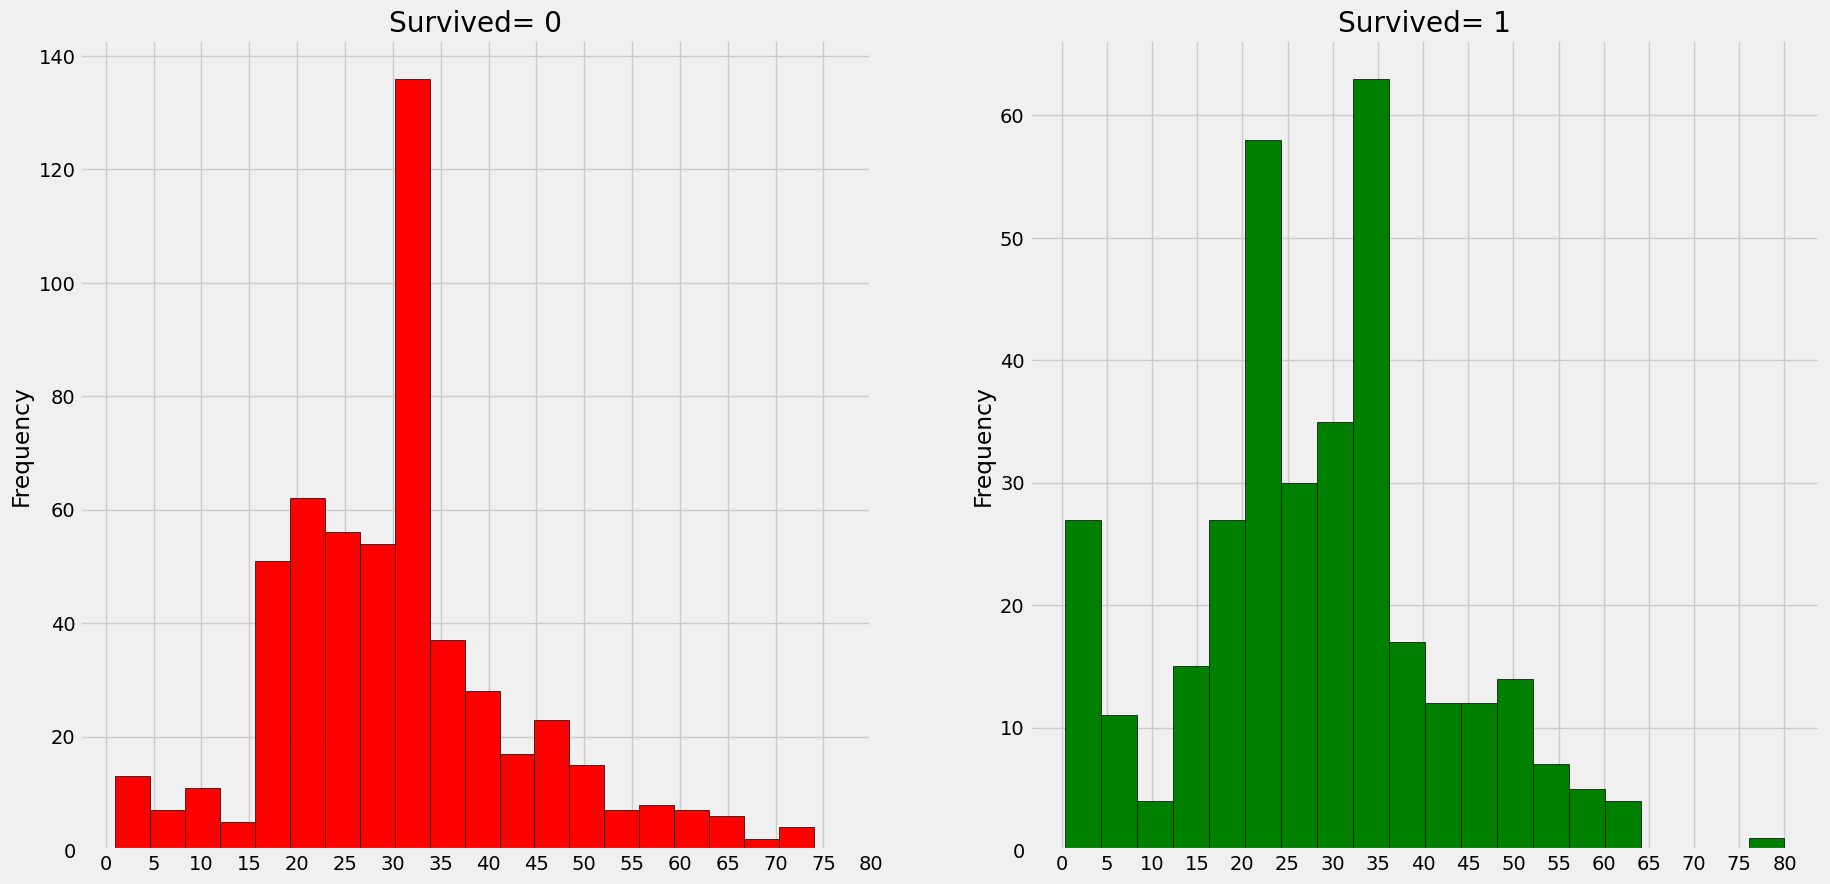

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

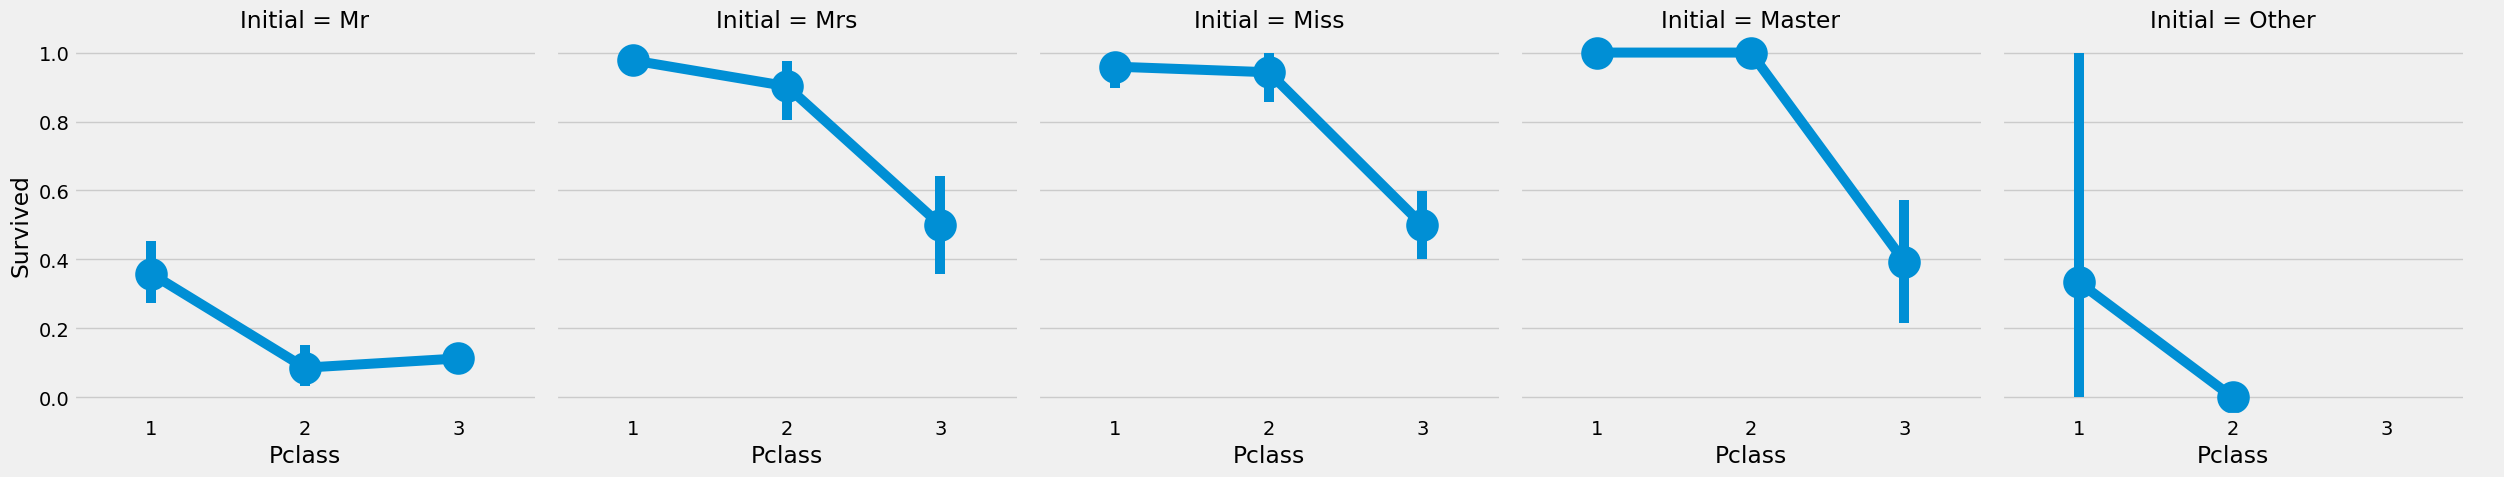

In [ ]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
plt.show()


In [ ]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

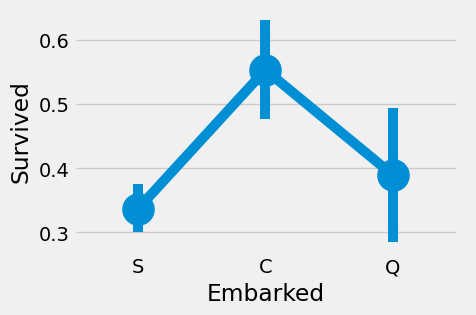

In [ ]:
sns.catplot(x='Embarked', y='Survived', data=data, kind='point')
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()


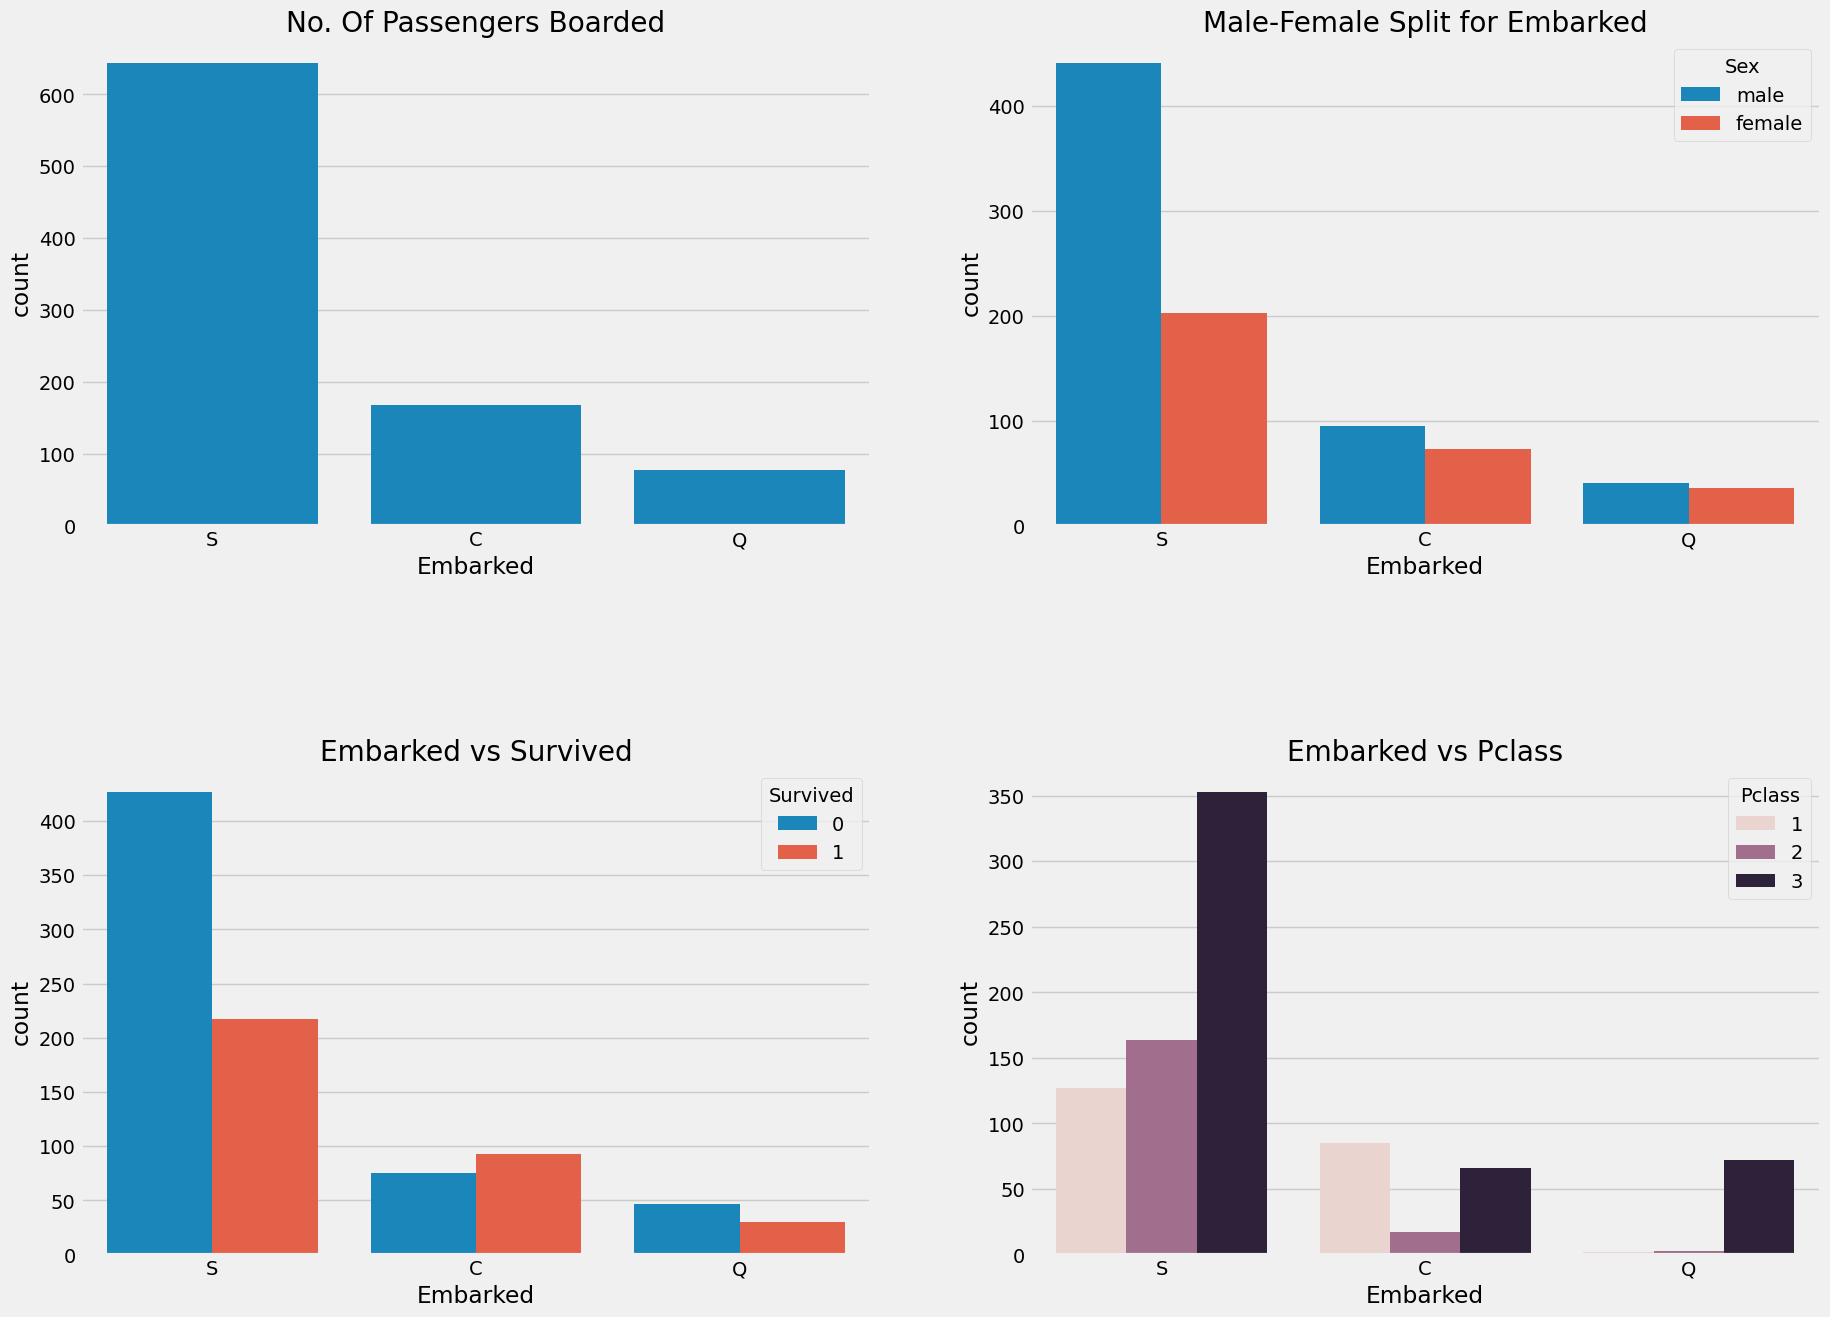

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot(x='Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


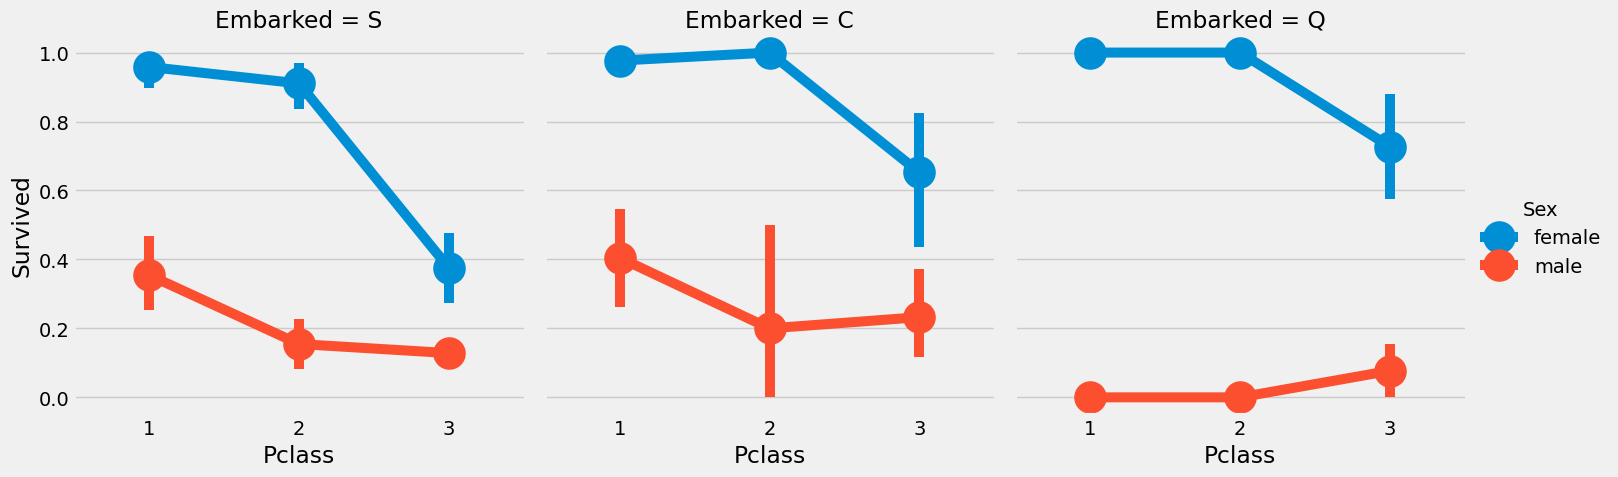

In [ ]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data, kind='point')
plt.show()


In [ ]:
data['Embarked'].fillna('S',inplace=True)

In [ ]:
data.Embarked.isnull().any()# Finally No NaN values

False

In [ ]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])

ax[0].set_title('SibSp vs Survived')
sns.catplot(x='SibSp', y='Survived', data=data, ax=ax[1])

ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

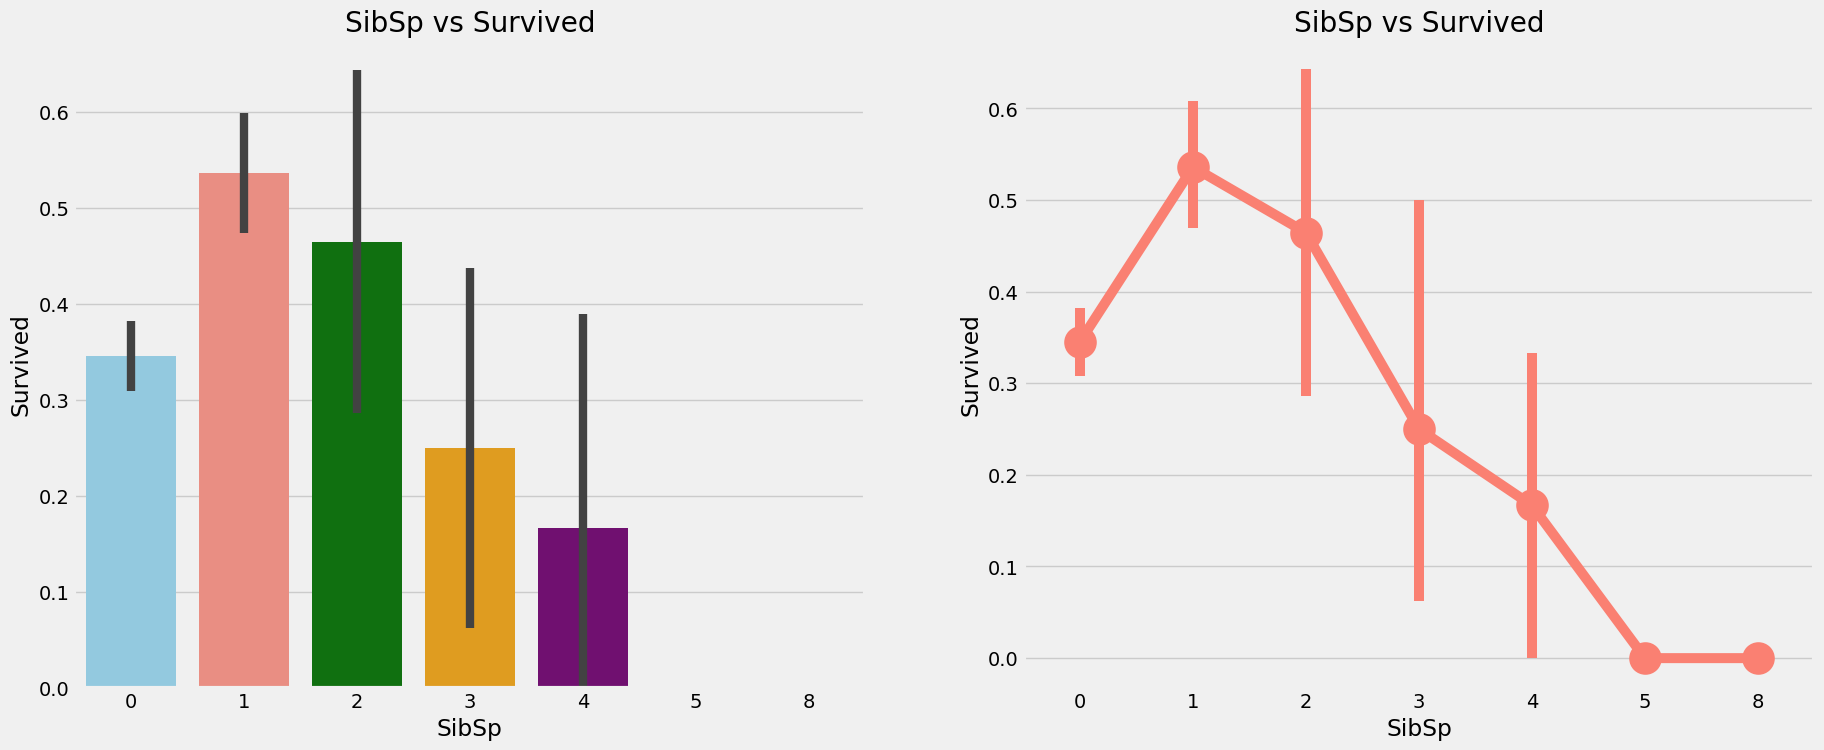

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette with different colors for each bar
colors = ['skyblue', 'salmon', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta']

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# First subplot (barplot)
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0], palette=colors)
ax[0].set_title('SibSp vs Survived')

# Second subplot (catplot with kind='point')
sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1], color='salmon')
ax[1].set_title('SibSp vs Survived')

plt.show()


In [ ]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [ ]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


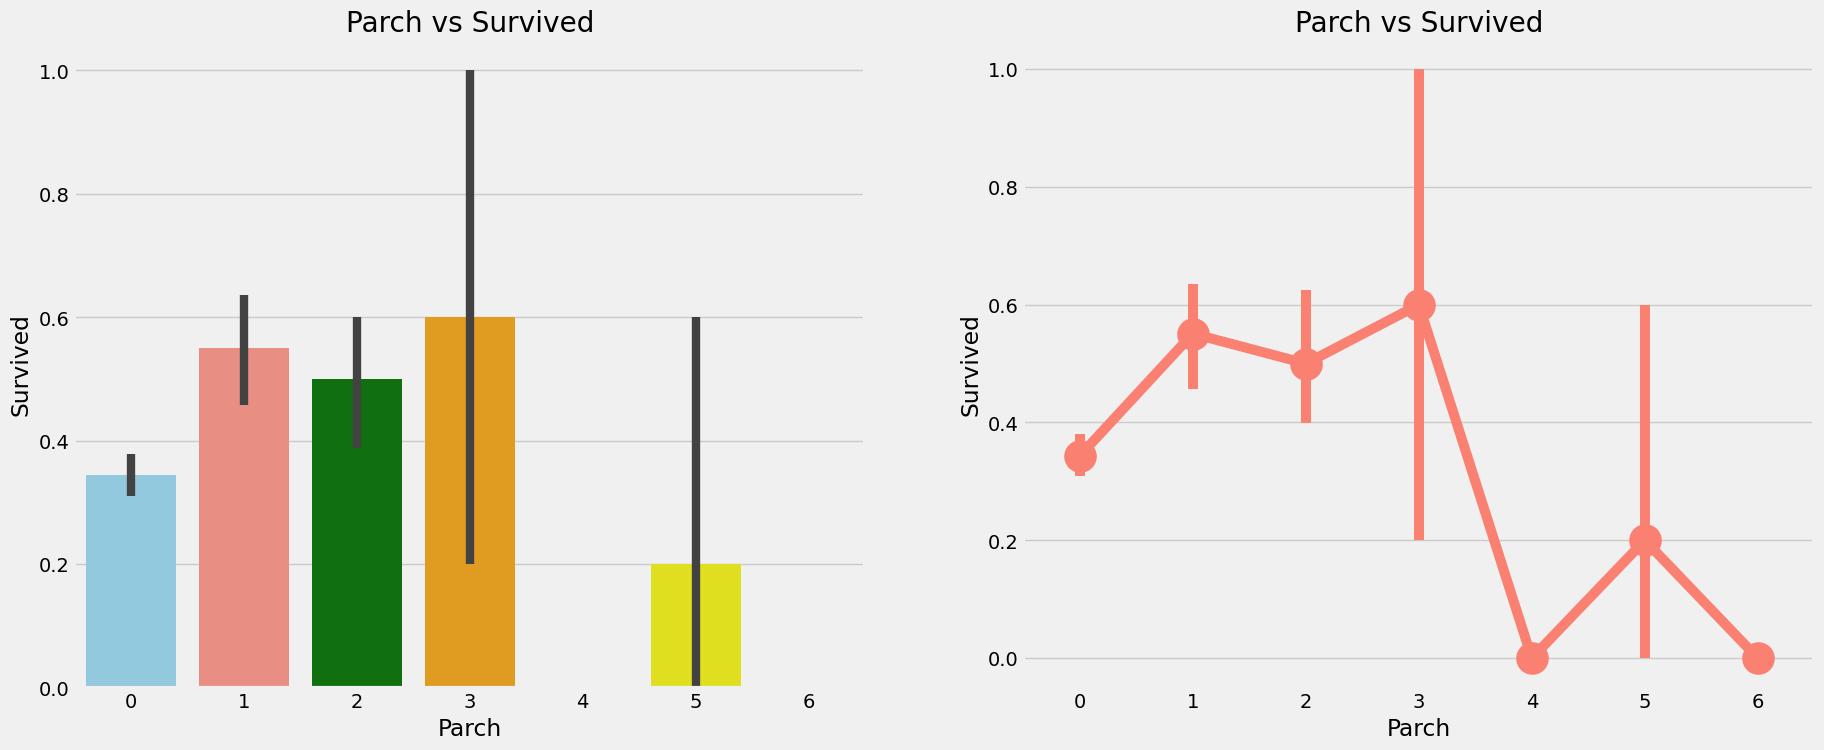

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette with different colors for each bar
colors = ['skyblue', 'salmon', 'green', 'orange', 'purple', 'yellow', 'cyan', 'magenta']

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# First subplot (barplot)
sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0], palette=colors)
ax[0].set_title('Parch vs Survived')

# Second subplot (pointplot with kind='point')
sns.pointplot(x='Parch', y='Survived', data=data, ax=ax[1], color='salmon')
ax[1].set_title('Parch vs Survived')

plt.show()


In [ ]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


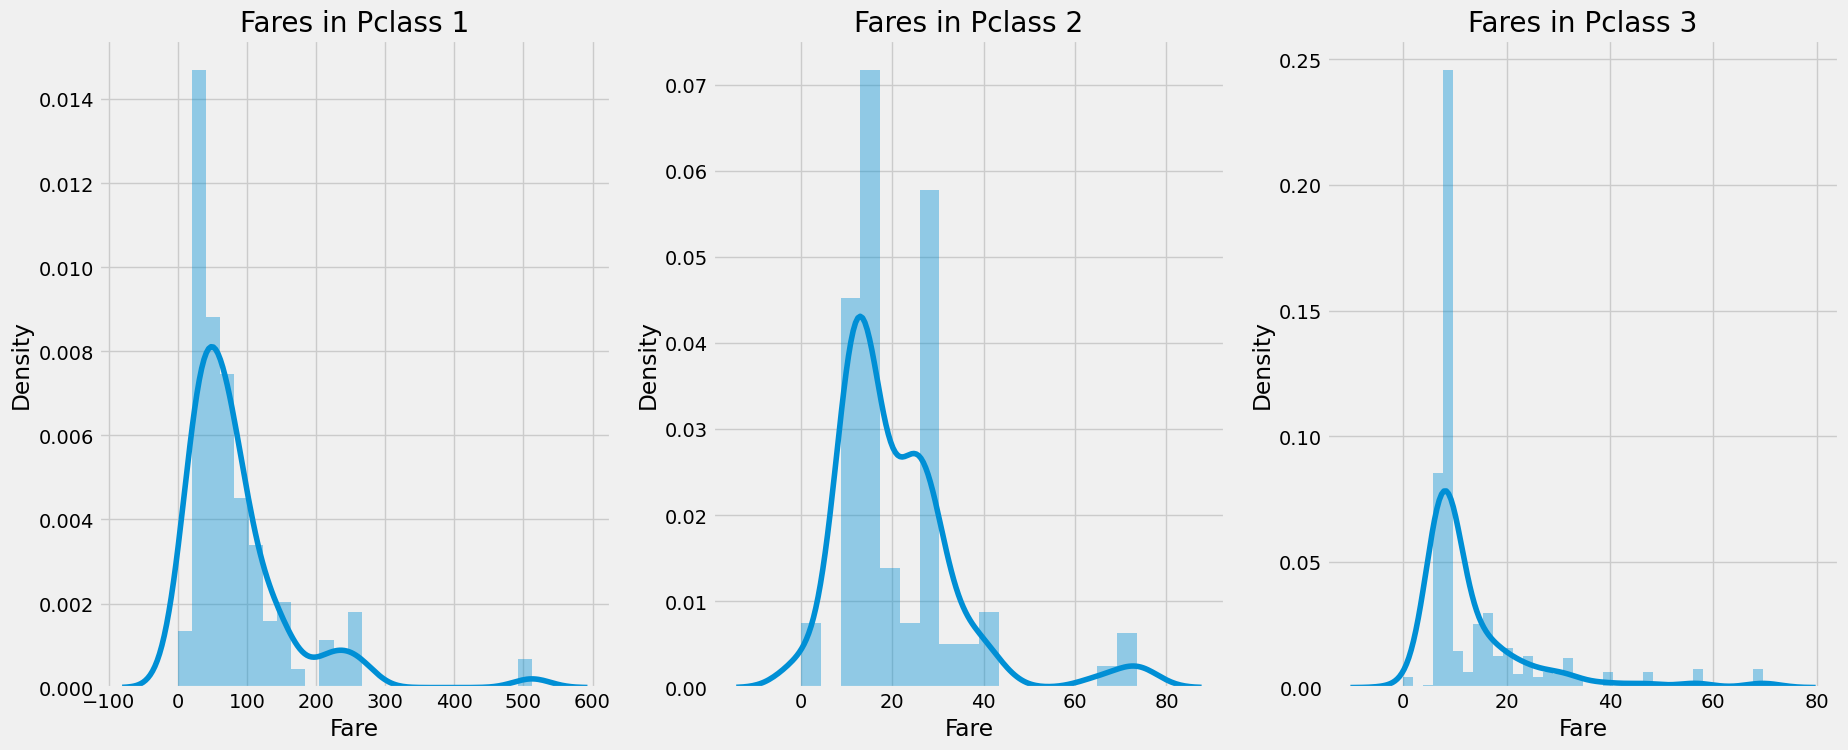

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

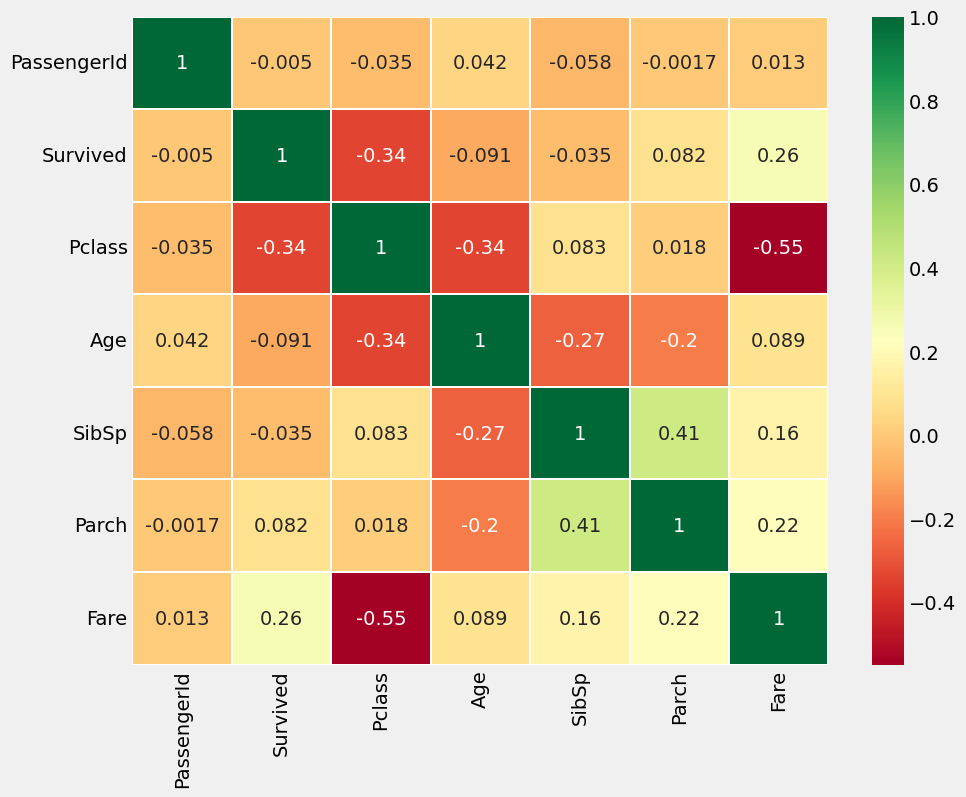

In [ ]:
# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include='number')

# Plot the correlation heatmap using only numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
plt.gcf().set_size_inches(10, 8)
plt.show()


In [ ]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [ ]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


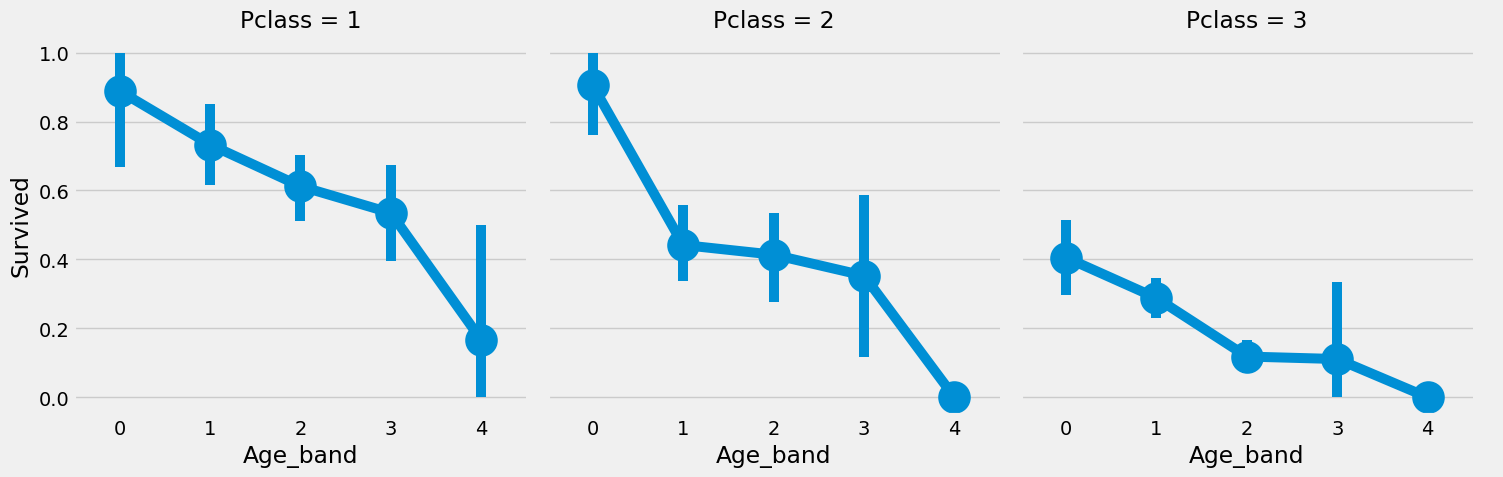

In [ ]:
sns.catplot(x='Age_band', y='Survived', data=data, col='Pclass', kind='point')
plt.show()


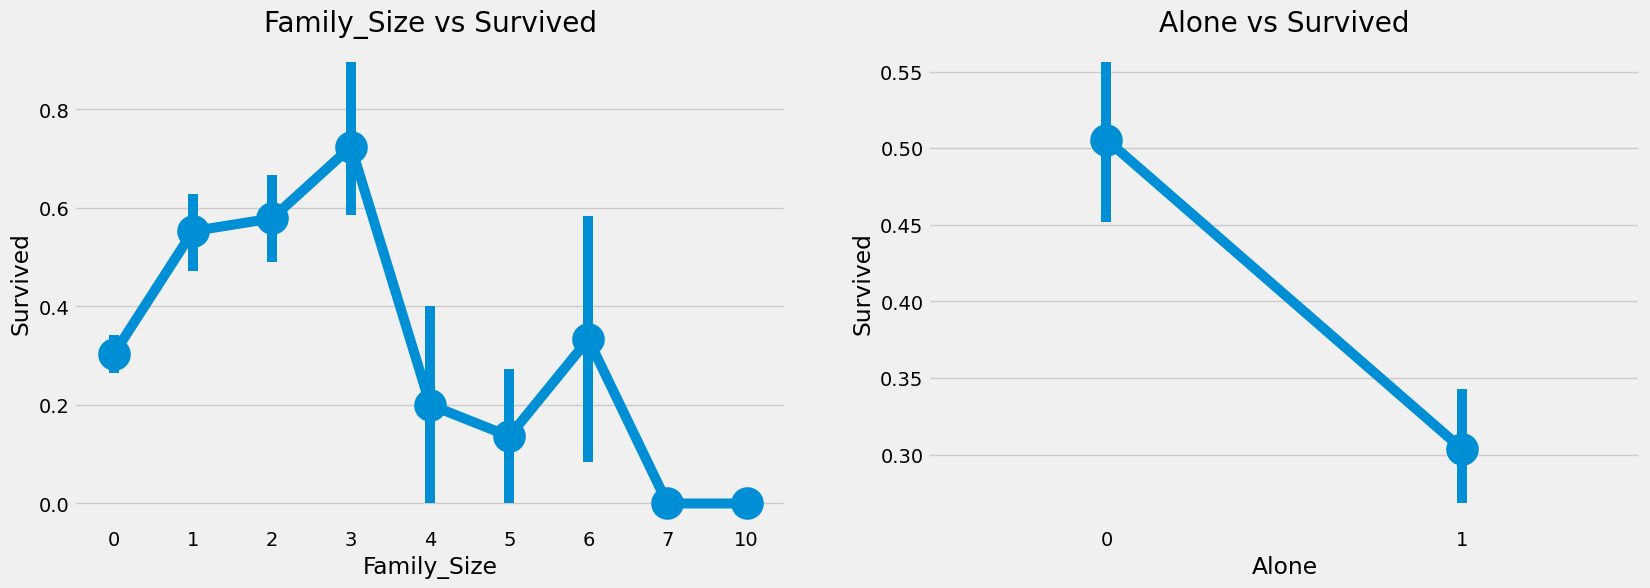

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Family_Size and Alone
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data['Family_Size'] == 0, 'Alone'] = 1

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# First subplot (Family_Size vs Survived)
sns.pointplot(x='Family_Size', y='Survived', data=data, ax=axes[0])
axes[0].set_title('Family_Size vs Survived')

# Second subplot (Alone vs Survived)
sns.pointplot(x='Alone', y='Survived', data=data, ax=axes[1])
axes[1].set_title('Alone vs Survived')

plt.show()


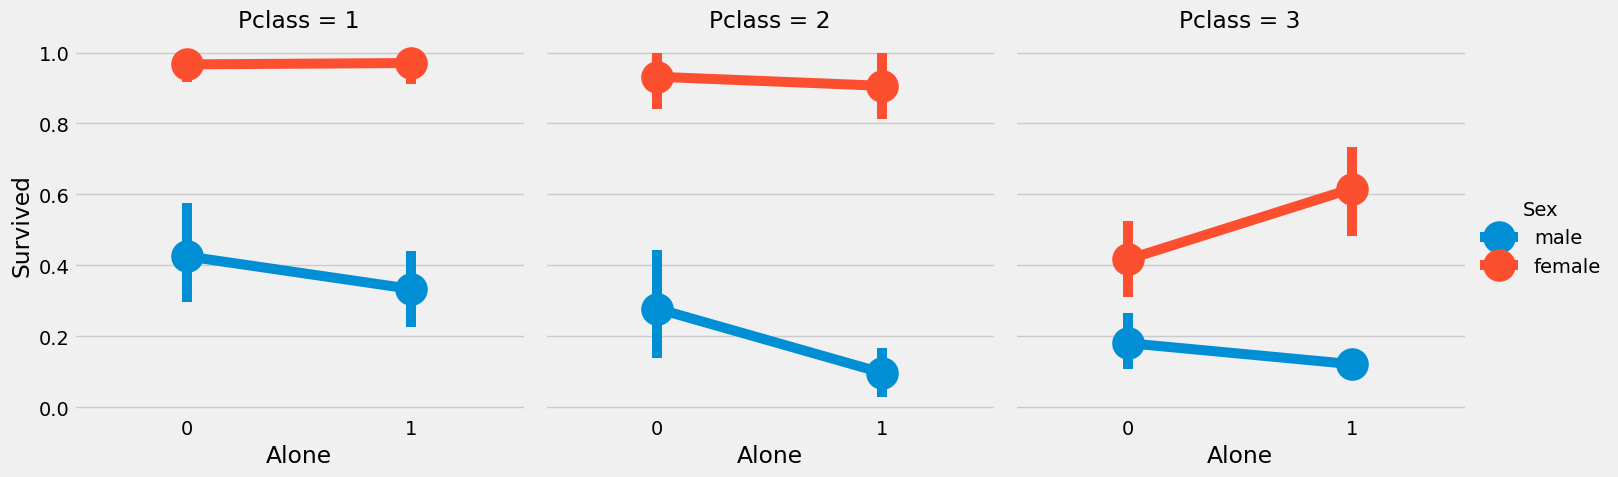

In [ ]:
sns.catplot(x='Alone', y='Survived', data=data, hue='Sex', col='Pclass', kind='point')
plt.show()


In [ ]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [ ]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

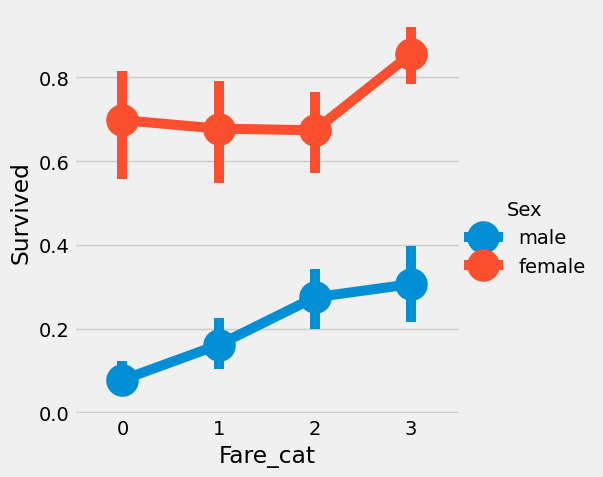

In [ ]:
sns.catplot(x='Fare_cat', y='Survived', data=data, hue='Sex', kind='point')
plt.show()


In [ ]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

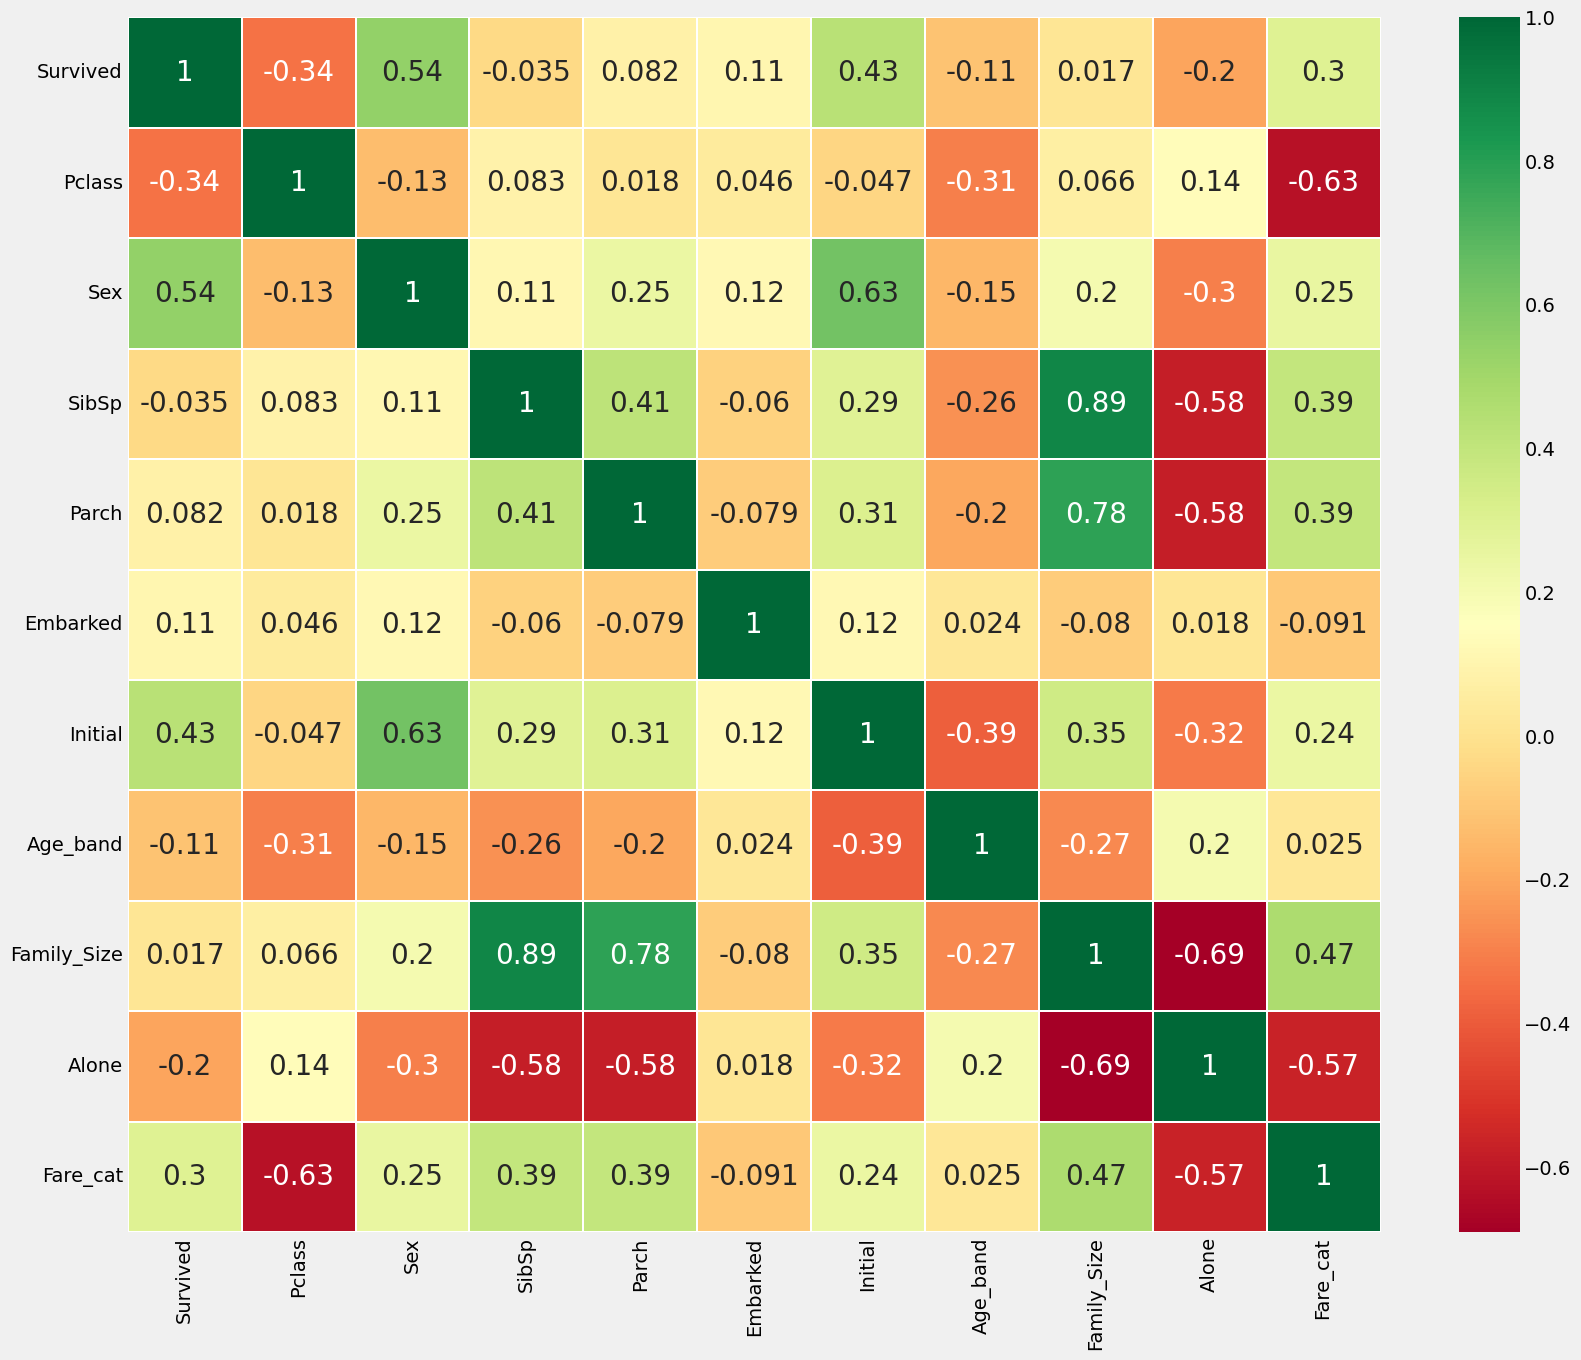

In [ ]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [ ]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

In [ ]:
# Drop non-numeric columns like names
train_X_numeric = train_X.select_dtypes(include=['number'])
test_X_numeric = test_X.select_dtypes(include=['number'])

# Train the model on the numerical training data
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X_numeric, train_Y)

# Make predictions on the numerical testing data
prediction1 = model.predict(test_X_numeric)

# Evaluate the accuracy of the model
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))


Accuracy for rbf SVM is 0.835820895522388


In [ ]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


In [ ]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


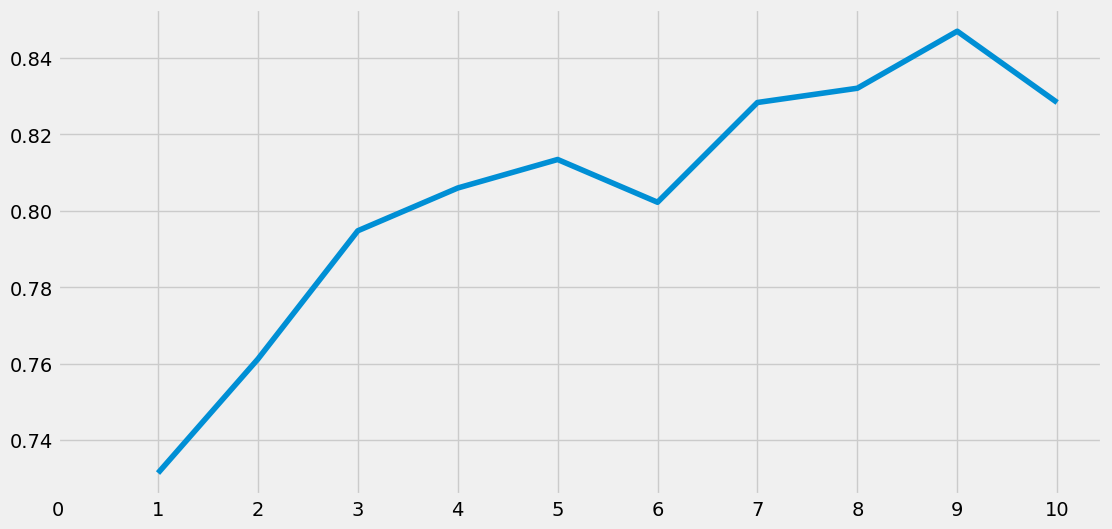

Accuracies for different values of n are: [0.7313432835820896, 0.7611940298507462, 0.7947761194029851, 0.8059701492537313, 0.8134328358208955, 0.8022388059701493, 0.8283582089552238, 0.832089552238806, 0.8470149253731343, 0.8283582089552238] with the max value as  0.8470149253731343
The value of n with the maximum accuracy is 9


In [ ]:
a_index = list(range(1, 11))
a = []  # Initialize as an empty Python list
x = list(range(11))
for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    accuracy = metrics.accuracy_score(prediction, test_Y)
    a.append(accuracy)

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

max_accuracy_index = a.index(max(a)) + 1
print('Accuracies for different values of n are:', a, 'with the max value as ', max(a))
print('The value of n with the maximum accuracy is', max_accuracy_index)


In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8097014925373134


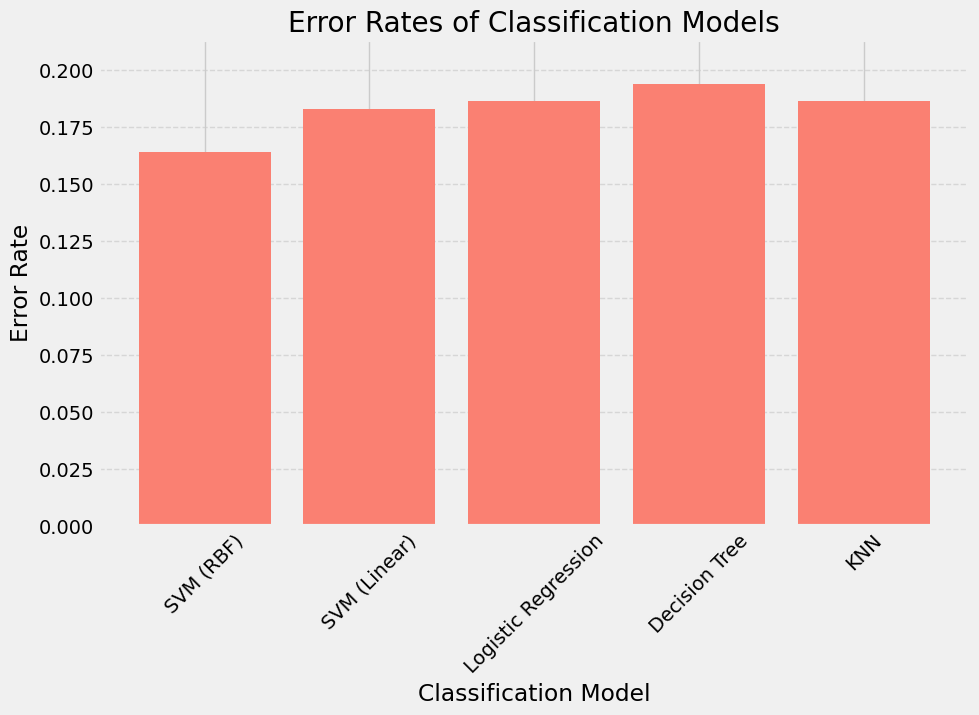

In [ ]:
# Calculate error rates for each model
error_rate_svm_rbf = 1 - metrics.accuracy_score(prediction1, test_Y)
error_rate_svm_linear = 1 - metrics.accuracy_score(prediction2, test_Y)
error_rate_logistic_regression = 1 - metrics.accuracy_score(prediction3, test_Y)
error_rate_decision_tree = 1 - metrics.accuracy_score(prediction4, test_Y)
error_rate_knn = 1 - metrics.accuracy_score(prediction5, test_Y)

# List of error rates
error_rates = [error_rate_svm_rbf, error_rate_svm_linear, error_rate_logistic_regression,
               error_rate_decision_tree, error_rate_knn]

# List of model names
model_names = ['SVM (RBF)', 'SVM (Linear)', 'Logistic Regression', 'Decision Tree', 'KNN']

# Plotting the error rates
plt.figure(figsize=(10, 6))
plt.bar(model_names, error_rates, color='salmon')
plt.xlabel('Classification Model')
plt.ylabel('Error Rate')
plt.title('Error Rates of Classification Models')
plt.ylim(0, max(error_rates) * 1.1)  # Set y-axis limit to show all error rates clearly
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


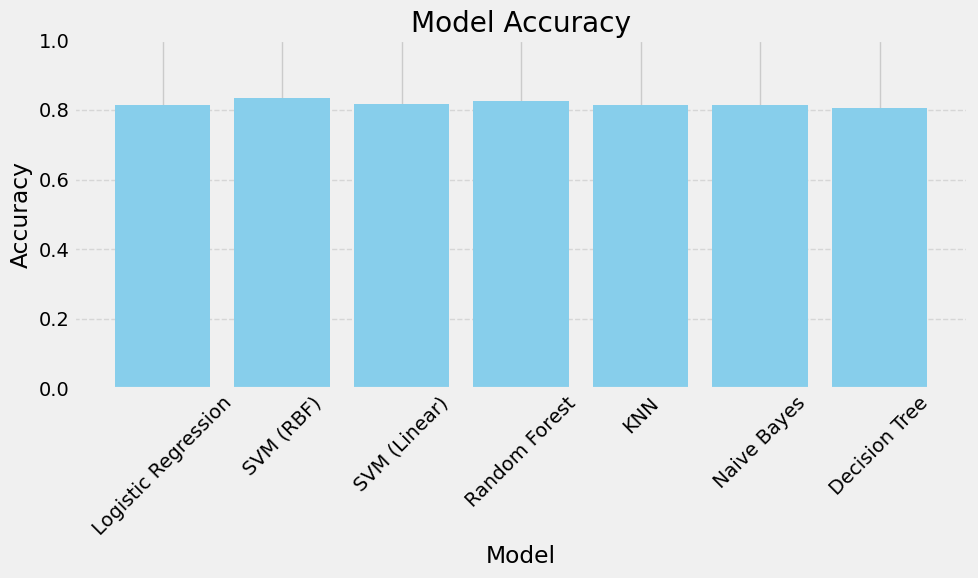

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Splitting the data into training and testing sets
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM (RBF)': svm.SVC(kernel='rbf', C=1, gamma=0.1),
    'SVM (Linear)': svm.SVC(kernel='linear', C=0.1, gamma=0.1),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train and evaluate each model
accuracies = {}
for name, model in models.items():
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    accuracy = metrics.accuracy_score(prediction, test_Y)
    accuracies[name] = accuracy

# Plotting accuracy
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to range from 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

# Initialize lists to store metrics
model_names = []
error_rates = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
supports = []

# Calculate metrics for each model
for name, model in models.items():
    # Calculate predictions
    prediction = model.predict(test_X)

    # Calculate accuracy
    accuracy = metrics.accuracy_score(prediction, test_Y)

    # Calculate error rate
    error_rate = 1 - accuracy

    # Calculate precision, recall, f1-score, and support
    precision, recall, f1_score, support = precision_recall_fscore_support(test_Y, prediction, average='weighted')

    # Store metrics in lists
    model_names.append(name)
    error_rates.append(error_rate)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
    supports.append(support)

# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'Error Rate': error_rates,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'Support': supports
})

# Apply conditional formatting to highlight the table with colors
styled_df = metrics_df.style.background_gradient(cmap='coolwarm', subset=['Error Rate', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Support'])

# Display the styled DataFrame
styled_df


,Model,Error Rate,Accuracy,Precision,Recall,F1 Score,Support
0,Logistic Regression,0.186567,0.813433,0.811926,0.813433,0.810936,None
1,SVM (RBF),0.164179,0.835821,0.836109,0.835821,0.832704,None
2,SVM (Linear),0.182836,0.817164,0.815703,0.817164,0.815847,None
3,Random Forest,0.175373,0.824627,0.825526,0.824627,0.820491,None
4,KNN,0.186567,0.813433,0.811926,0.813433,0.810936,None
5,Naive Bayes,0.186567,0.813433,0.814182,0.813433,0.813761,None
6,Decision Tree,0.194030,0.805970,0.806106,0.805970,0.801082,None


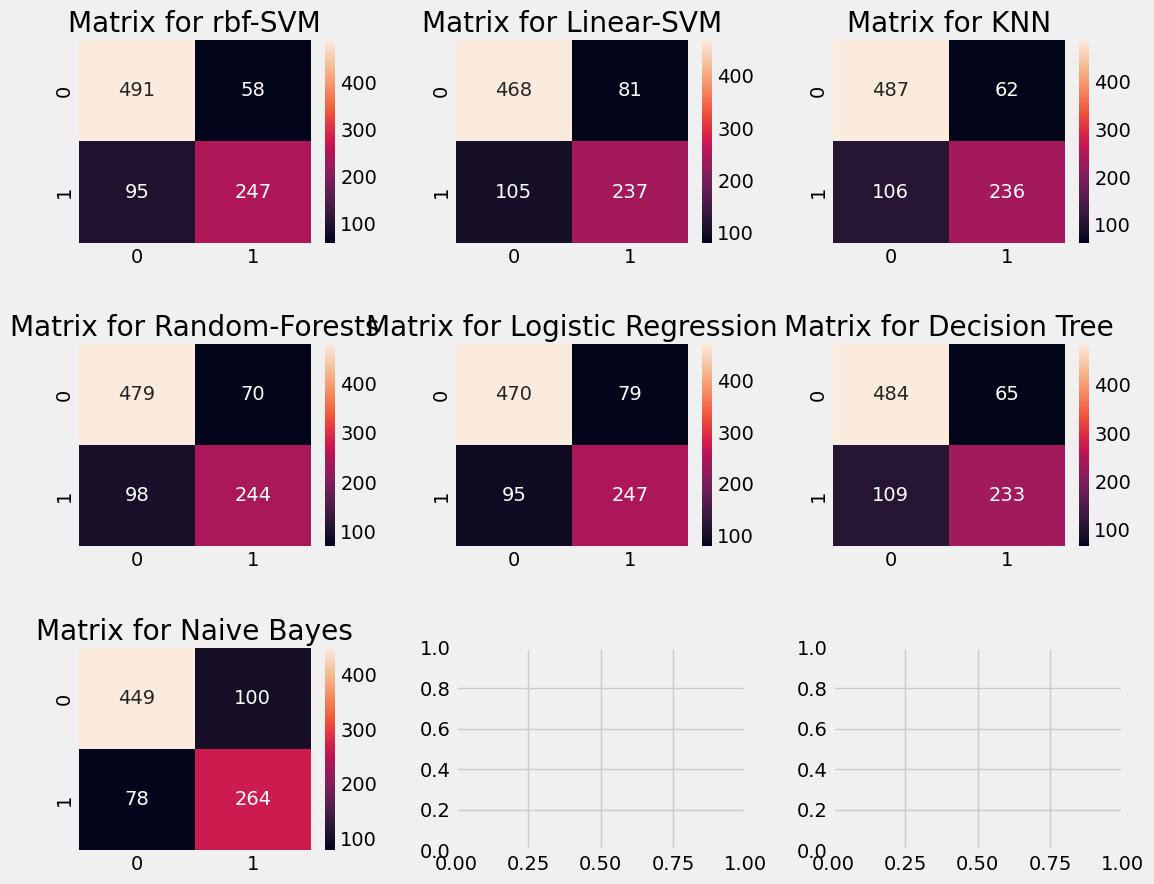

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Assuming X and Y are already defined

f, ax = plt.subplots(3, 3, figsize=(12, 10))

y_pred = cross_val_predict(SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0, 0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0, 1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0, 2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1, 1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Matrix for Naive Bayes')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from tabulate import tabulate

# Assuming 'data' is your DataFrame containing the dataset

# Splitting the data into features (X) and target variable (Y)
X = data.drop('Survived', axis=1)
Y = data['Survived']

# Splitting the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM (RBF)': svm.SVC(kernel='rbf', C=1, gamma=0.1),
    'SVM (Linear)': svm.SVC(kernel='linear', C=0.1, gamma=0.1),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Initialize lists to store evaluation metrics
classifier_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
support_survived = []

# Loop through each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(train_X, train_Y)

    # Make predictions
    predictions = clf.predict(test_X)

    # Calculate evaluation metrics
    accuracy = metrics.accuracy_score(test_Y, predictions)
    precision = metrics.precision_score(test_Y, predictions)
    recall = metrics.recall_score(test_Y, predictions)
    f1_score = metrics.f1_score(test_Y, predictions)
    support = metrics.precision_recall_fscore_support(test_Y, predictions)[3][1]  # Support for Survived

    # Append evaluation metrics to the lists
    classifier_names.append(clf_name)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1_score)
    support_survived.append(support)

# Create a DataFrame to display evaluation metrics
metrics_df = pd.DataFrame({
    'Classifier': classifier_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'Support Survived': support_survived
})

# Display the DataFrame using tabulate
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))


+---------------------+--------------------+--------------------+--------------------+--------------------+------------------+
|     Classifier      |      Accuracy      |     Precision      |       Recall       |      F1 Score      | Support Survived |
+---------------------+--------------------+--------------------+--------------------+--------------------+------------------+
| Logistic Regression | 0.8134328358208955 | 0.7912087912087912 | 0.6990291262135923 | 0.7422680412371134 |       103        |
|      SVM (RBF)      | 0.835820895522388  | 0.8390804597701149 | 0.7087378640776699 | 0.7684210526315789 |       103        |
|    SVM (Linear)     | 0.8171641791044776 |      0.78125       | 0.7281553398058253 | 0.7537688442211056 |       103        |
|    Random Forest    | 0.8208955223880597 | 0.8160919540229885 | 0.6893203883495146 | 0.7473684210526317 |       103        |
|         KNN         | 0.8134328358208955 | 0.7912087912087912 | 0.6990291262135923 | 0.7422680412371134 |    

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from tabulate import tabulate
import tensorflow as tf

# Assuming 'data' is your DataFrame containing the dataset

# Splitting the data into features (X) and target variable (Y)
X = data.drop('Survived', axis=1)
Y = data['Survived']

# Splitting the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=0, stratify=Y)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM (Linear)': svm.SVC(kernel='linear', C=0.1, gamma=0.1),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'CNN': 'Convolutional Neural Network'
}

# CNN classifier
def create_cnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Initialize lists to store evaluation metrics
classifier_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
support_survived = []

# Loop through each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier
    if clf_name == 'CNN':
        # Reshape data for CNN input (assuming input_shape is (number_of_features, channels))
        train_X_cnn = train_X.values.reshape(train_X.shape[0], train_X.shape[1], 1)
        test_X_cnn = test_X.values.reshape(test_X.shape[0], test_X.shape[1], 1)

        # Create and compile CNN model
        cnn_model = create_cnn_model(input_shape=(train_X_cnn.shape[1], 1))
        cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Train CNN model
        cnn_model.fit(train_X_cnn, train_Y, epochs=10, batch_size=32, verbose=0)

        # Evaluate CNN model and store metrics
        cnn_predictions_proba = cnn_model.predict(test_X_cnn)
        cnn_predictions = (cnn_predictions_proba > 0.5).astype(int)
        cnn_accuracy = metrics.accuracy_score(test_Y, cnn_predictions)
        cnn_precision = metrics.precision_score(test_Y, cnn_predictions)
        cnn_recall = metrics.recall_score(test_Y, cnn_predictions)
        cnn_f1_score = metrics.f1_score(test_Y, cnn_predictions)
        cnn_support = metrics.precision_recall_fscore_support(test_Y, cnn_predictions)[3][1]  # Support for Survived

        # Append evaluation metrics to the lists
        classifier_names.append(clf_name)
        accuracy_scores.append(cnn_accuracy)
        precision_scores.append(cnn_precision)
        recall_scores.append(cnn_recall)
        f1_scores.append(cnn_f1_score)
        support_survived.append(cnn_support)

    else:
        clf.fit(train_X, train_Y)

        # Make predictions
        predictions = clf.predict(test_X)

        # Calculate evaluation metrics
        accuracy = metrics.accuracy_score(test_Y, predictions)
        precision = metrics.precision_score(test_Y, predictions)
        recall = metrics.recall_score(test_Y, predictions)
        f1_score = metrics.f1_score(test_Y, predictions)
        support = metrics.precision_recall_fscore_support(test_Y, predictions)[3][1]  # Support for Survived

        # Append evaluation metrics to the lists
        classifier_names.append(clf_name)
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1_score)
        support_survived.append(support)

# Create a DataFrame to display evaluation metrics
metrics_df = pd.DataFrame({
    'Classifier': classifier_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'Support Survived': support_survived
})

# Display the DataFrame using tabulate
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', showindex=False))


9/9 [==============================] - 0s 2ms/step
+---------------------+--------------------+--------------------+--------------------+--------------------+------------------+
|     Classifier      |      Accuracy      |     Precision      |       Recall       |      F1 Score      | Support Survived |
+---------------------+--------------------+--------------------+--------------------+--------------------+------------------+
| Logistic Regression | 0.8134328358208955 | 0.7912087912087912 | 0.6990291262135923 | 0.7422680412371134 |       103        |
|    SVM (Linear)     | 0.8171641791044776 |      0.78125       | 0.7281553398058253 | 0.7537688442211056 |       103        |
|    Random Forest    | 0.8134328358208955 | 0.8045977011494253 | 0.6796116504854369 | 0.736842105263158  |       103        |
|         KNN         | 0.8134328358208955 | 0.7912087912087912 | 0.6990291262135923 | 0.7422680412371134 |       103        |
|     Naive Bayes     | 0.8134328358208955 | 0.7523809523809

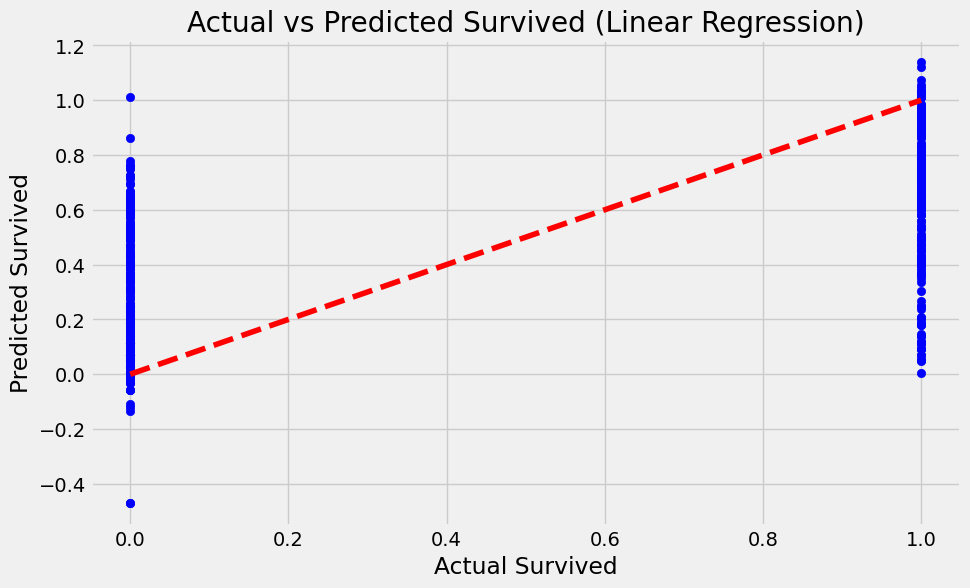

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming 'train_X' and 'train_Y' are your training features and target variable respectively

# Fit linear regression model
regression_model = LinearRegression()
regression_model.fit(train_X, train_Y)

# Predict target variable using the trained model
predicted_Y = regression_model.predict(train_X)

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(train_Y, predicted_Y, color='blue')
plt.plot([min(train_Y), max(train_Y)], [min(train_Y), max(train_Y)], color='red', linestyle='--')
plt.xlabel('Actual Survived')
plt.ylabel('Predicted Survived')
plt.title('Actual vs Predicted Survived (Linear Regression)')
plt.grid(True)
plt.show()


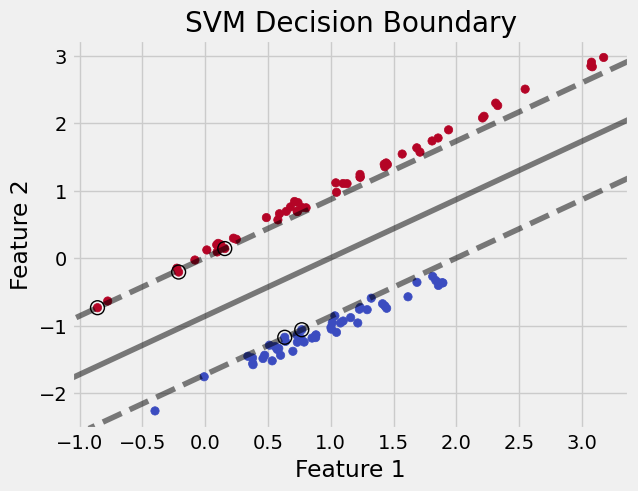

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Fit SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

# Plot decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()


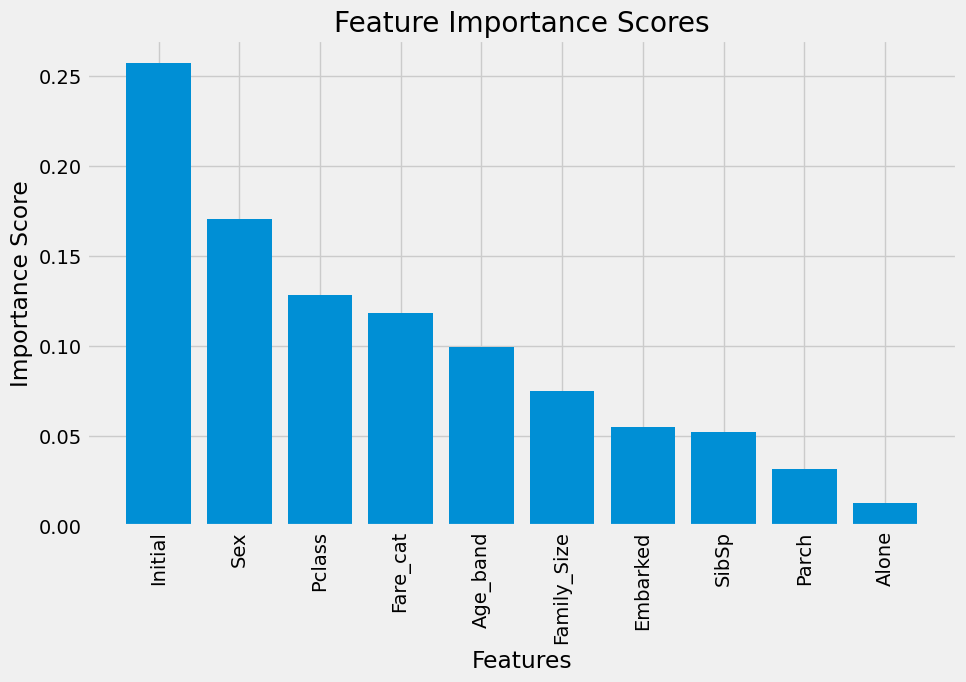

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming 'train_X' is your training feature matrix and 'train_Y' is your training target variable

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(train_X, train_Y)

# Get feature importances
importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(train_X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(train_X.shape[1]), train_X.columns[sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.show()


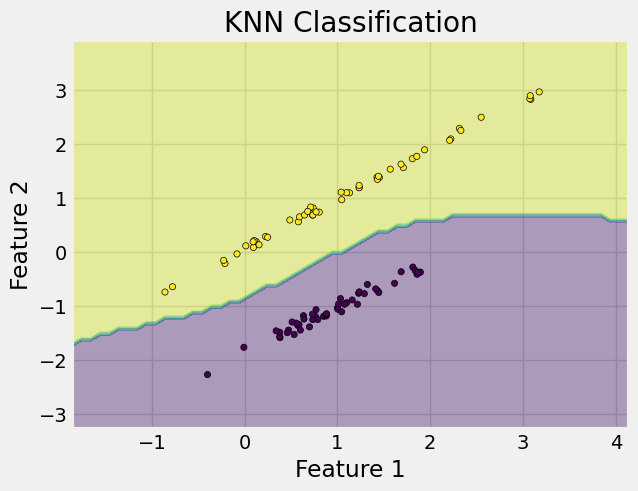

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_clusters_per_class=1, n_redundant=0, random_state=42)

# Fit KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot data points
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KNN Classification')
plt.show()


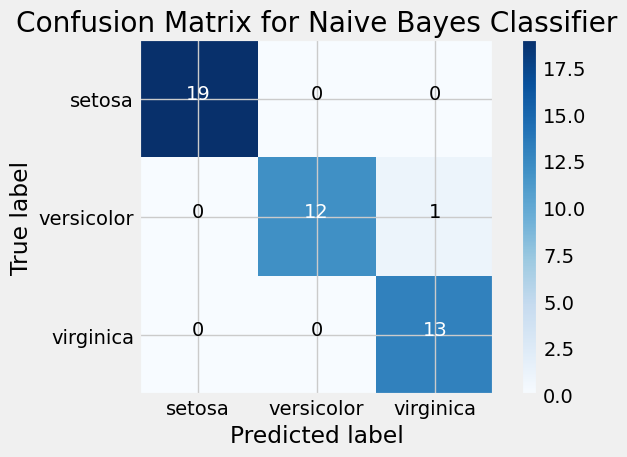

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.colorbar()
classes = data.target_names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


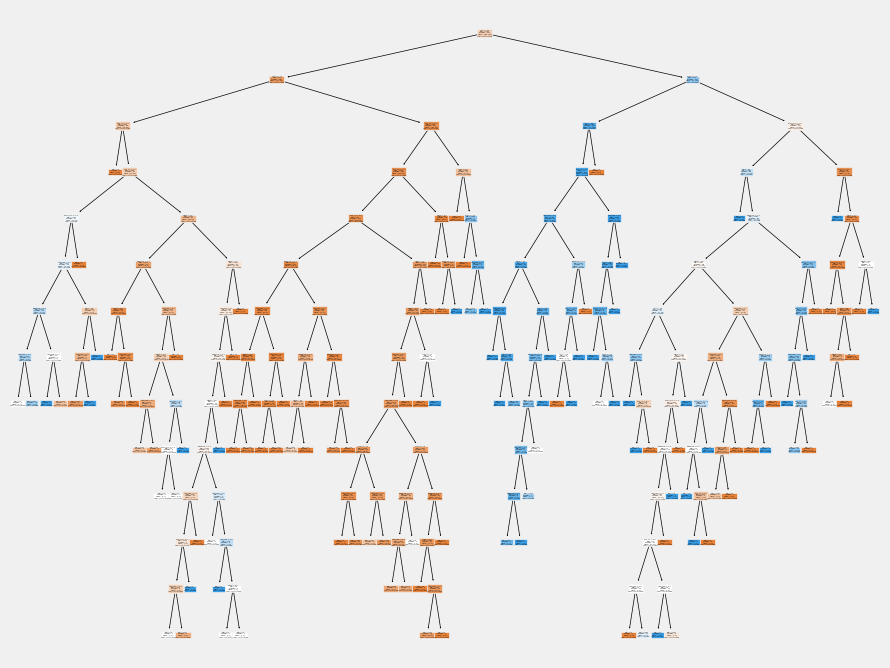

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier on your data
clf.fit(train_X, train_Y)

# Plot the decision tree
plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True, feature_names=train_X.columns, class_names=['Not Survived', 'Survived'])
plt.show()


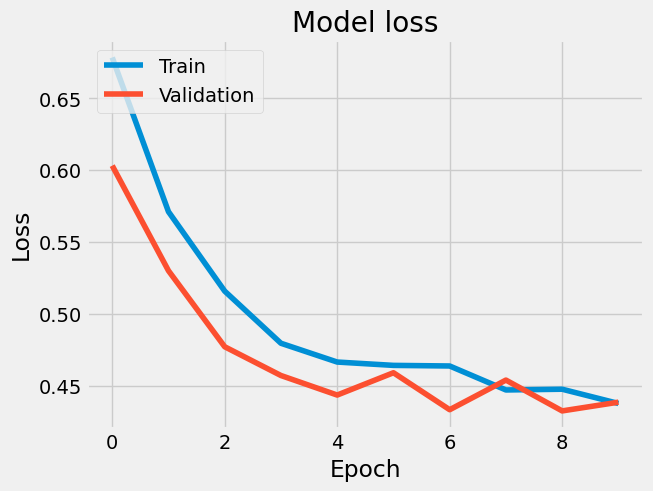

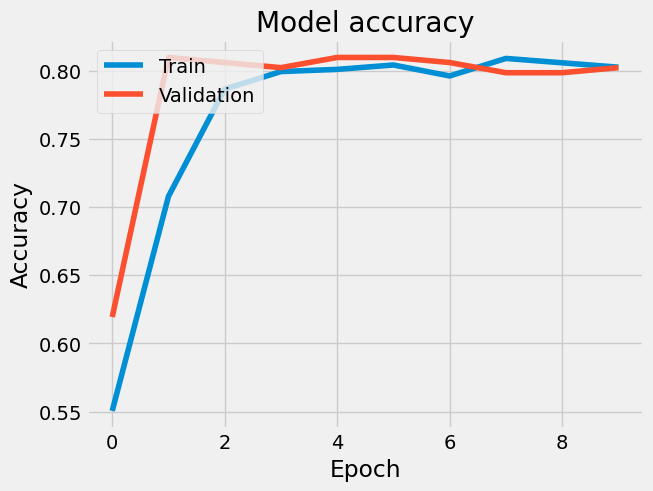

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the history object returned by model.fit()

# Define input shape based on your data
input_shape = (train_X_cnn.shape[1], 1)

# Define and compile your CNN model
model = create_cnn_model(input_shape)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train your CNN model
history = model.fit(train_X_cnn, train_Y, epochs=10, batch_size=32, validation_data=(test_X_cnn, test_Y), verbose=0)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
